# Screen Time Analysis 


1. <a href="#1.-Libraries-Imported" >Libraries Imported</a> 
2. <a href="#2.-Importing-Data">Importing Data and Merging Data</a> 
3. <a href="#3.-Exploratory-Data-Analysis">Exploratory Data Analysis</a> 
4. <a href="#4.-Descriptive-Statistics">Descriptive Statistics</a>
5. <a href="#5.-Machine-Learning-Models">Machine Learning Models</a>

## 1. Libraries Imported


In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from functools import reduce

if sns:
    print("Seaborn already installed and imported as sns successfully")
else:
    !conda install -c anaconda seaborn -y


Seaborn already installed and imported as sns successfully


## 2. Importing Data and Merging Data

In [2]:
import pandas as pd

# Load the three CSV files
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')
df3 = pd.read_csv('dataset3.csv')
print(df1.shape)
print(df2.shape)
print(df3.shape)

# Merge all dataframes on 'ID' in one line
dfs = [df1, df2, df3]  # List of dataframes
merged_df = reduce(lambda left, right: pd.merge(left, right, on='ID'), dfs)
print(merged_df.head())
# Save the merged data to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)

print("CSV files merged successfully!")


(120115, 4)
(113359, 9)
(102580, 15)
        ID  gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  \
0  1087192       0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   
1  1087195       0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   
2  1087205       0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   
3  1087214       0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   
4  1087222       0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   

   ...  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  \
0  ...     4       4       4       4      5     4       4      5       4   
1  ...     3       4       5       3      5     4       4      5       4   
2  ...     3       3       3       3      4     3       3      3       4   
3  ...     4       4       4       4      3     5       4      5       4   
4  ...     2       3       3       4      4     3       5      5       5   

   Cheer  
0      4  
1      4  
2   

## 3. Exploratory Data Analysis

In [82]:
# Checking how many rows and Columns in our dataset
merged_df.shape
merged_df.isnull().sum()

ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64

In [4]:
# Calculate total weekday screen time (for C_wk, G_wk, S_wk, T_wk)
merged_df['Total_Weekday_Screen_Time'] = merged_df['C_wk'] + merged_df['G_wk'] + merged_df['S_wk'] + merged_df['T_wk']

# Calculate total weekend screen time (for C_we, G_we, S_we, T_we)
merged_df['Total_Weekend_Screen_Time'] = merged_df['C_we'] + merged_df['G_we'] + merged_df['S_we'] + merged_df['T_we']

# Calculate total weekday screen time (for C_wk, G_wk, S_wk, T_wk)
merged_df['Total_Screen_Time'] = merged_df['Total_Weekday_Screen_Time'] + merged_df['Total_Weekend_Screen_Time']
# Display the updated dataframe with the new columns
print(merged_df[['ID', 'Total_Weekday_Screen_Time', 'Total_Weekend_Screen_Time','Total_Screen_Time']].head())


# Descriptive statistics: mean, median, mode, standard deviation, min, max
desc_stats = merged_df.describe()
median_values = merged_df.median()
mode_values = merged_df.mode()

#print("Descriptive Statistics:\n", desc_stats)
#print("\nMedian Values:\n", median_values)
#print("\nMode Values:\n", mode_values)

        ID  Total_Weekday_Screen_Time  Total_Weekend_Screen_Time  \
0  1087192                        3.5                        7.5   
1  1087195                        3.0                        9.0   
2  1087205                        2.0                        4.5   
3  1087214                        5.0                        8.5   
4  1087222                        5.0                        5.0   

   Total_Screen_Time  
0               11.0  
1               12.0  
2                6.5  
3               13.5  
4               10.0  


## Calculating and Plotting Average Score vs Screen Time

        ID  Overall_Score  Optm  Usef  Relx  Intp  Engs  Dealpr  Thcklr  \
0  1087192              4     3     4     3     4     4       4       4   
1  1087195              4     4     4     3     5     3       4       5   
2  1087205              3     3     2     3     3     3       3       3   
3  1087214              4     3     4     4     4     4       4       4   
4  1087222              4     3     3     4     5     2       3       3   

   Goodme  Clsep  Conf  Mkmind  Loved  Intthg  Cheer  
0       4      5     4       4      5       4      4  
1       3      5     4       4      5       4      4  
2       3      4     3       3      3       4      4  
3       4      3     5       4      5       4      4  
4       4      4     3       5      5       5      5  
        ID  Overall_Score  Optm  Usef  Relx  Intp  Engs  Dealpr  Thcklr  \
0  1087192              4     3     4     3     4     4       4       4   
1  1087195              4     4     4     3     5     3       4      

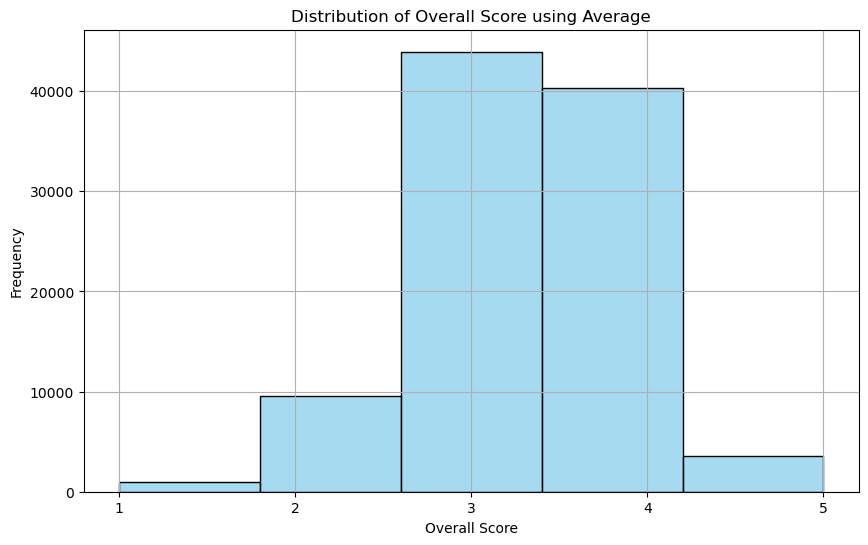

In [27]:
import pandas as pd

# List of columns to be considered
columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Function to calculate overall score based on average
def calculate_overall_score_based_on_average(row, columns):
    # Calculate the average of all the columns
    average_value = row[columns].mean()
    
    # Determine overall score based on average value
    if average_value <= 1.5:
        return 1
    elif average_value <= 2.5:
        return 2
    elif average_value <= 3.5:
        return 3
    elif average_value <= 4.5:
        return 4
    else:
        return 5

# Apply the function to each row and create a new column 'Overall_Score'
merged_df['Overall_Score'] = merged_df.apply(lambda row: calculate_overall_score_based_on_average(row, columns), axis=1)

# Display the updated dataframe with the new 'Overall_Score' column
print(merged_df[['ID', 'Overall_Score'] + columns].head())
# Display the updated dataframe with the new column
print(merged_df[['ID', 'Overall_Score'] + columns].head())
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for Overall_Score
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Overall_Score'], bins=5, kde=False, color='skyblue')
plt.title('Distribution of Overall Score using Average')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3, 4, 5])  # Set x-ticks for each score
plt.grid(True)
plt.show()

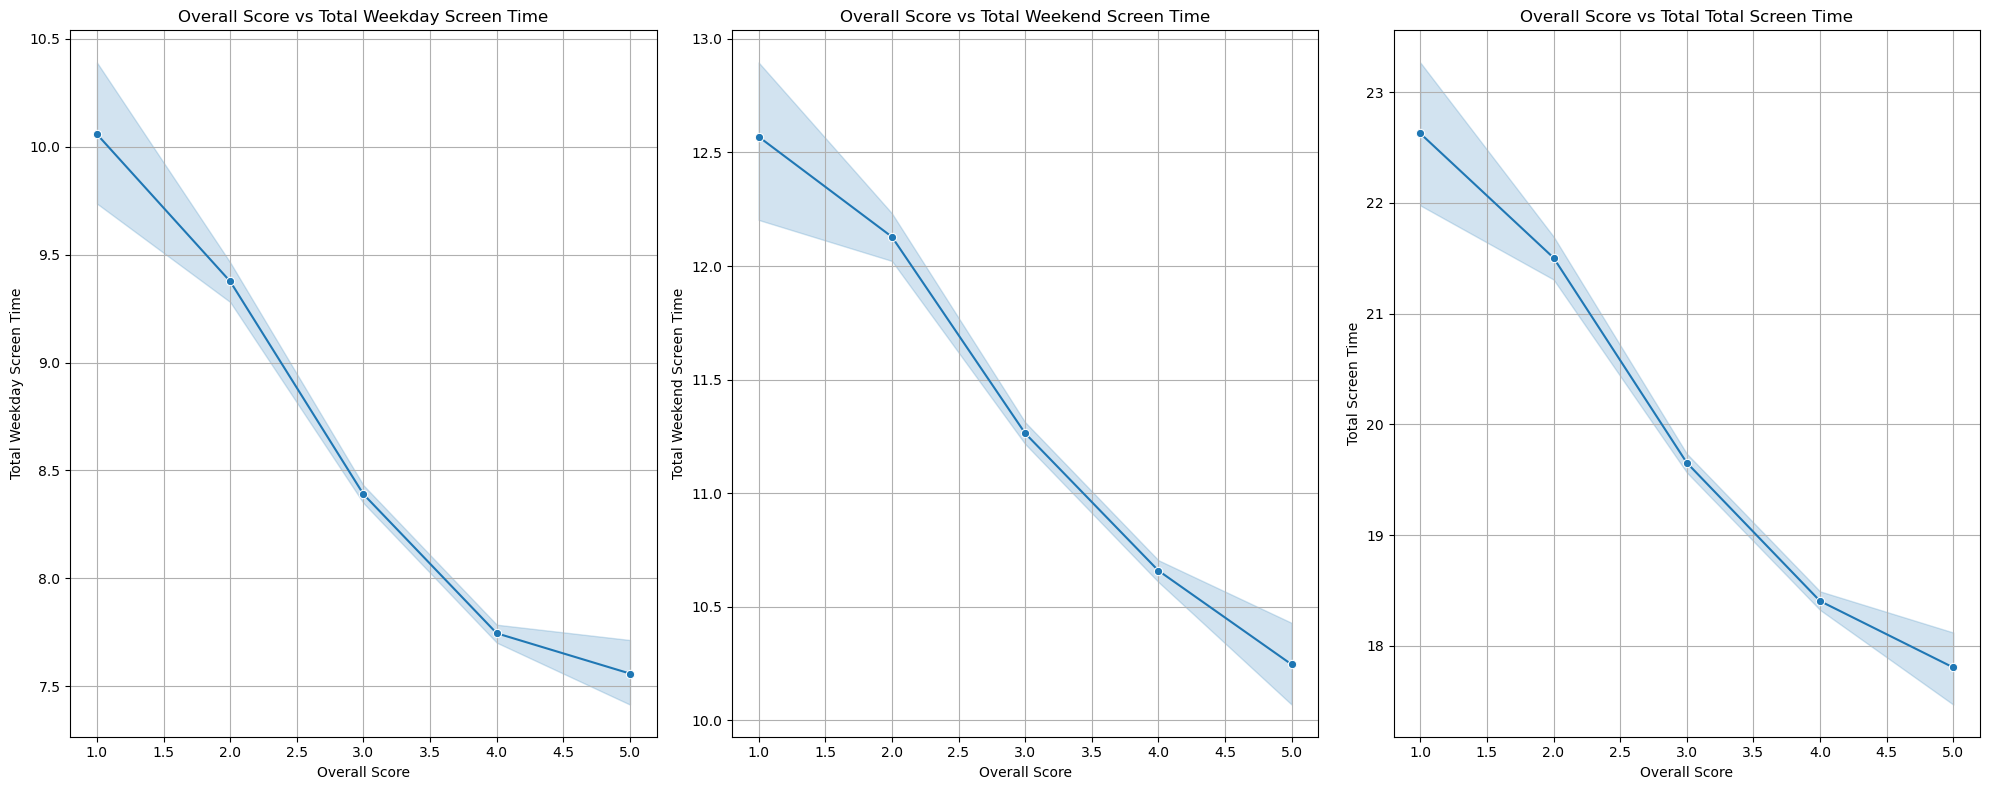

In [85]:
# Plotting the line plot for Overall_Score vs Total_Weekday_Screen_Time
plt.figure(figsize=(20, 8))

# Line plot for Overall_Score vs Total_Weekday_Screen_Time
plt.subplot(1, 3, 1)
sns.lineplot(x='Overall_Score', y='Total_Weekday_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Weekday Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Weekday Screen Time')
plt.grid(True)

# Line plot for Overall_Score vs Total_Weekend_Screen_Time
plt.subplot(1, 3, 2)
sns.lineplot(x='Overall_Score', y='Total_Weekend_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Weekend Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Weekend Screen Time')
plt.grid(True)

# Line plot for Overall_Score vs Total_Screen_Time
plt.subplot(1, 3, 3)
sns.lineplot(x='Overall_Score', y='Total_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Total Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Screen Time')
plt.grid(True)

plt.tight_layout()
plt.show()


## Calculating Median and Mode based overall score and comparing them with screen time

C:\Users\GOLDEN COMPUTERS\AppData\Local\Temp\ipykernel_10184\1595687672.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode([row[col] for col in columns])[0][0]  # Mode returns an array, so we extract the first value


        ID  Median_Score  Mode_Score  Optm  Usef  Relx  Intp  Engs  Dealpr  \
0  1087192           4.0         4.0     3     4     3     4     4       4   
1  1087195           4.0         4.0     4     4     3     5     3       4   
2  1087205           3.0         3.0     3     2     3     3     3       3   
3  1087214           4.0         4.0     3     4     4     4     4       4   
4  1087222           4.0         3.0     3     3     4     5     2       3   

   Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  Cheer  
0       4       4      5     4       4      5       4      4  
1       5       3      5     4       4      5       4      4  
2       3       3      4     3       3      3       4      4  
3       4       4      3     5       4      5       4      4  
4       3       4      4     3       5      5       5      5  


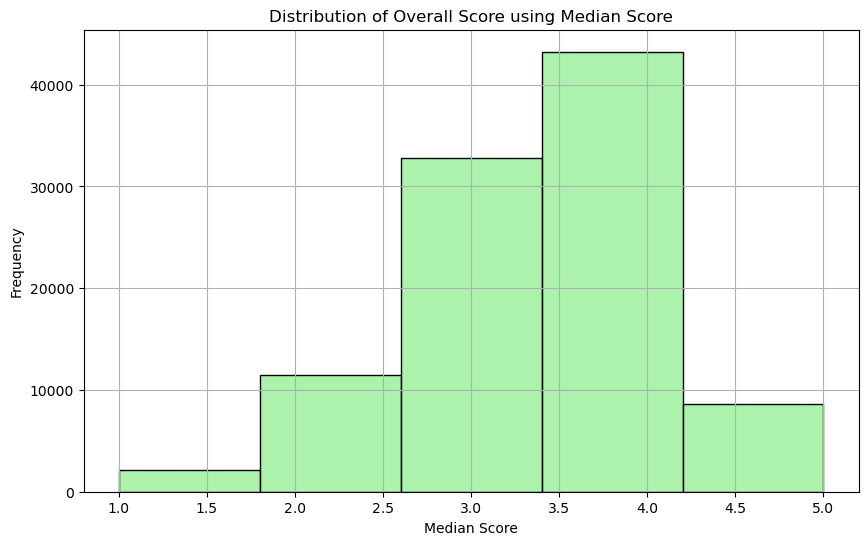

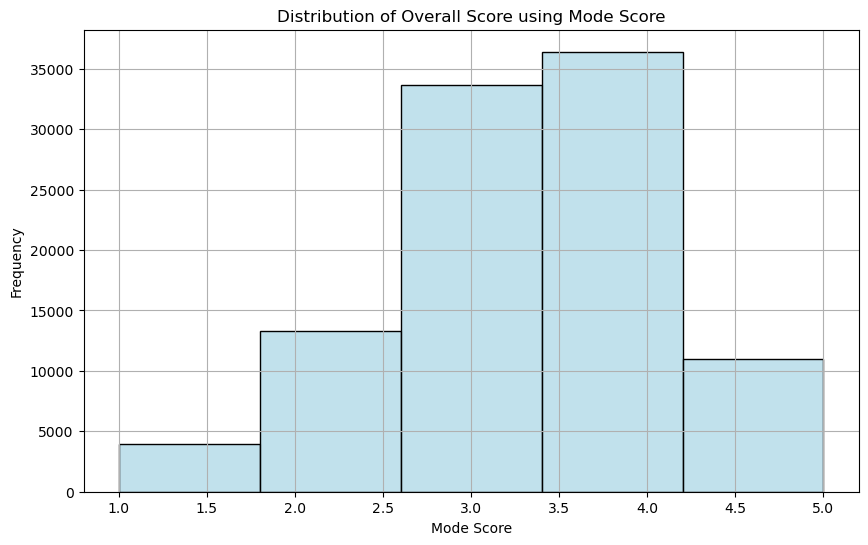

In [28]:
import pandas as pd
import numpy as np
from scipy import stats

# List of columns to be considered
columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Function to calculate the median for each row
def calculate_median(row, columns):
    return np.median([row[col] for col in columns])

# Function to calculate the mode for each row
def calculate_mode(row, columns):
    mode_value = stats.mode([row[col] for col in columns])[0][0]  # Mode returns an array, so we extract the first value
    return mode_value

# Apply the median function to each row and create a new column 'Median_Score'
merged_df['Median_Score'] = merged_df.apply(lambda row: calculate_median(row, columns), axis=1)

# Apply the mode function to each row and create a new column 'Mode_Score'
merged_df['Mode_Score'] = merged_df.apply(lambda row: calculate_mode(row, columns), axis=1)

# Display the updated dataframe with the new columns
print(merged_df[['ID', 'Median_Score', 'Mode_Score'] + columns].head())

# Plotting the histogram for Median_Score
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for Median_Score
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Median_Score'], bins=5, kde=False, color='lightgreen')
plt.title('Distribution of Overall Score using Median Score')
plt.xlabel('Median Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the histogram for Mode_Score
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Mode_Score'], bins=5, kde=False, color='lightblue')
plt.title('Distribution of Overall Score using Mode Score')
plt.xlabel('Mode Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


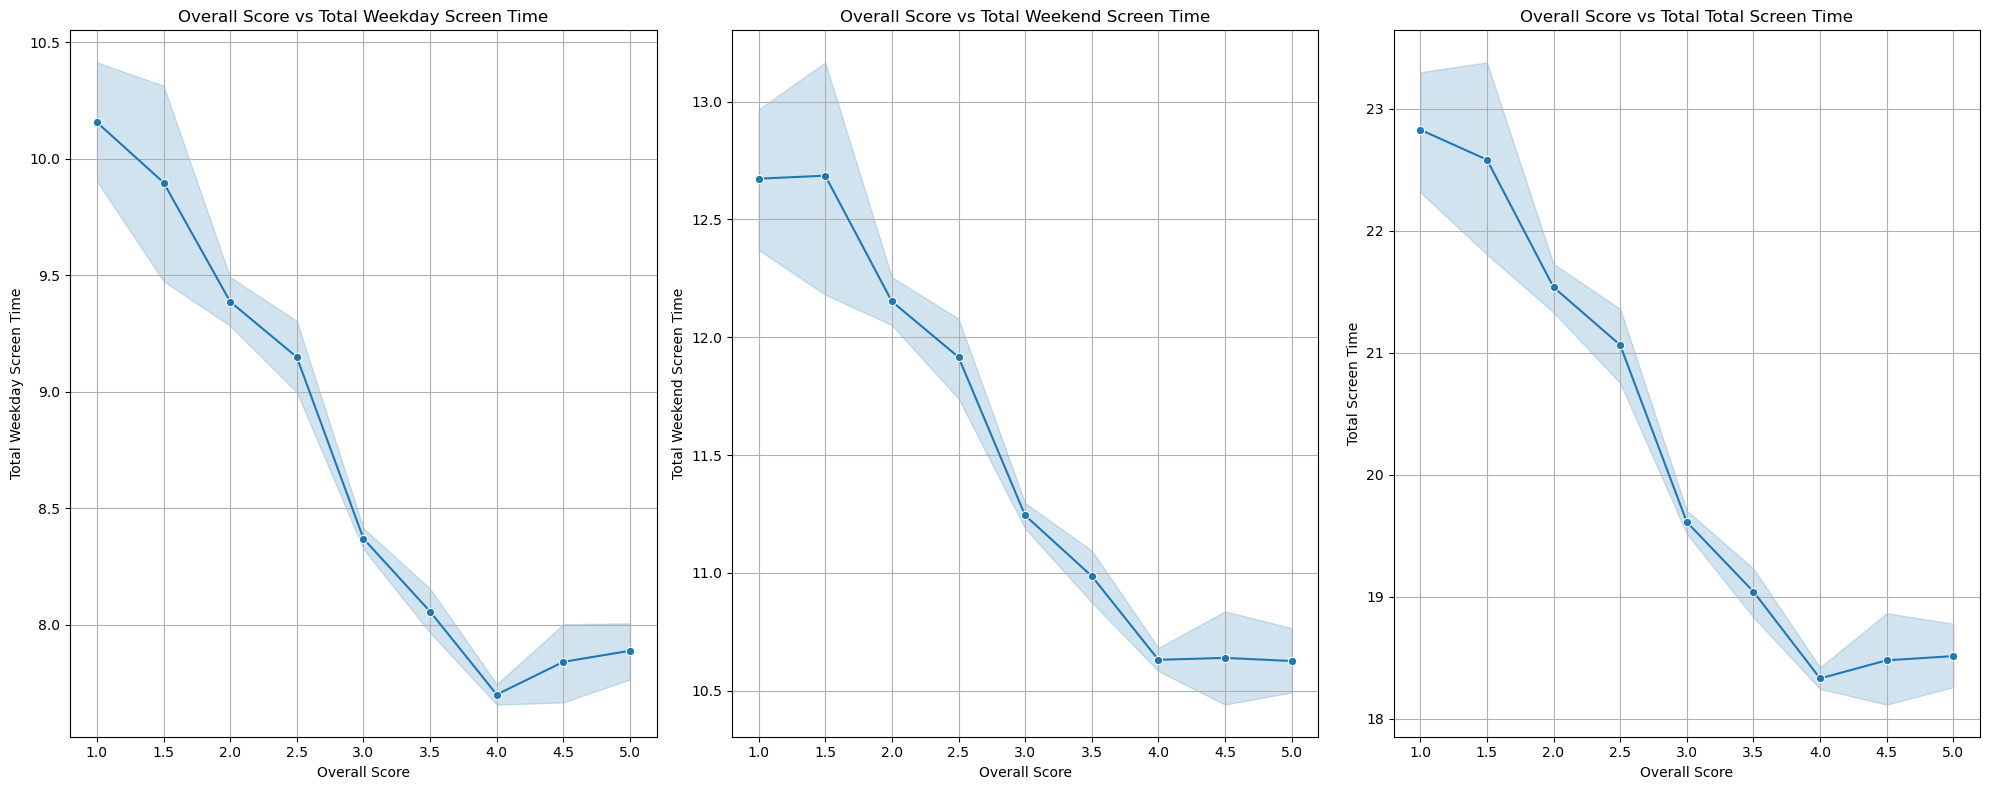

In [87]:
# Plotting the line plot for Overall_Score vs Total_Weekday_Screen_Time
plt.figure(figsize=(20, 8))

# Line plot for Overall_Score vs Total_Weekday_Screen_Time
plt.subplot(1, 3, 1)
sns.lineplot(x='Median_Score', y='Total_Weekday_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Weekday Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Weekday Screen Time')
plt.grid(True)

# Line plot for Overall_Score vs Total_Weekend_Screen_Time
plt.subplot(1, 3, 2)
sns.lineplot(x='Median_Score', y='Total_Weekend_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Weekend Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Weekend Screen Time')
plt.grid(True)

# Line plot for Overall_Score vs Total_Screen_Time
plt.subplot(1, 3, 3)
sns.lineplot(x='Median_Score', y='Total_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Total Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Screen Time')
plt.grid(True)

plt.tight_layout()
plt.show()


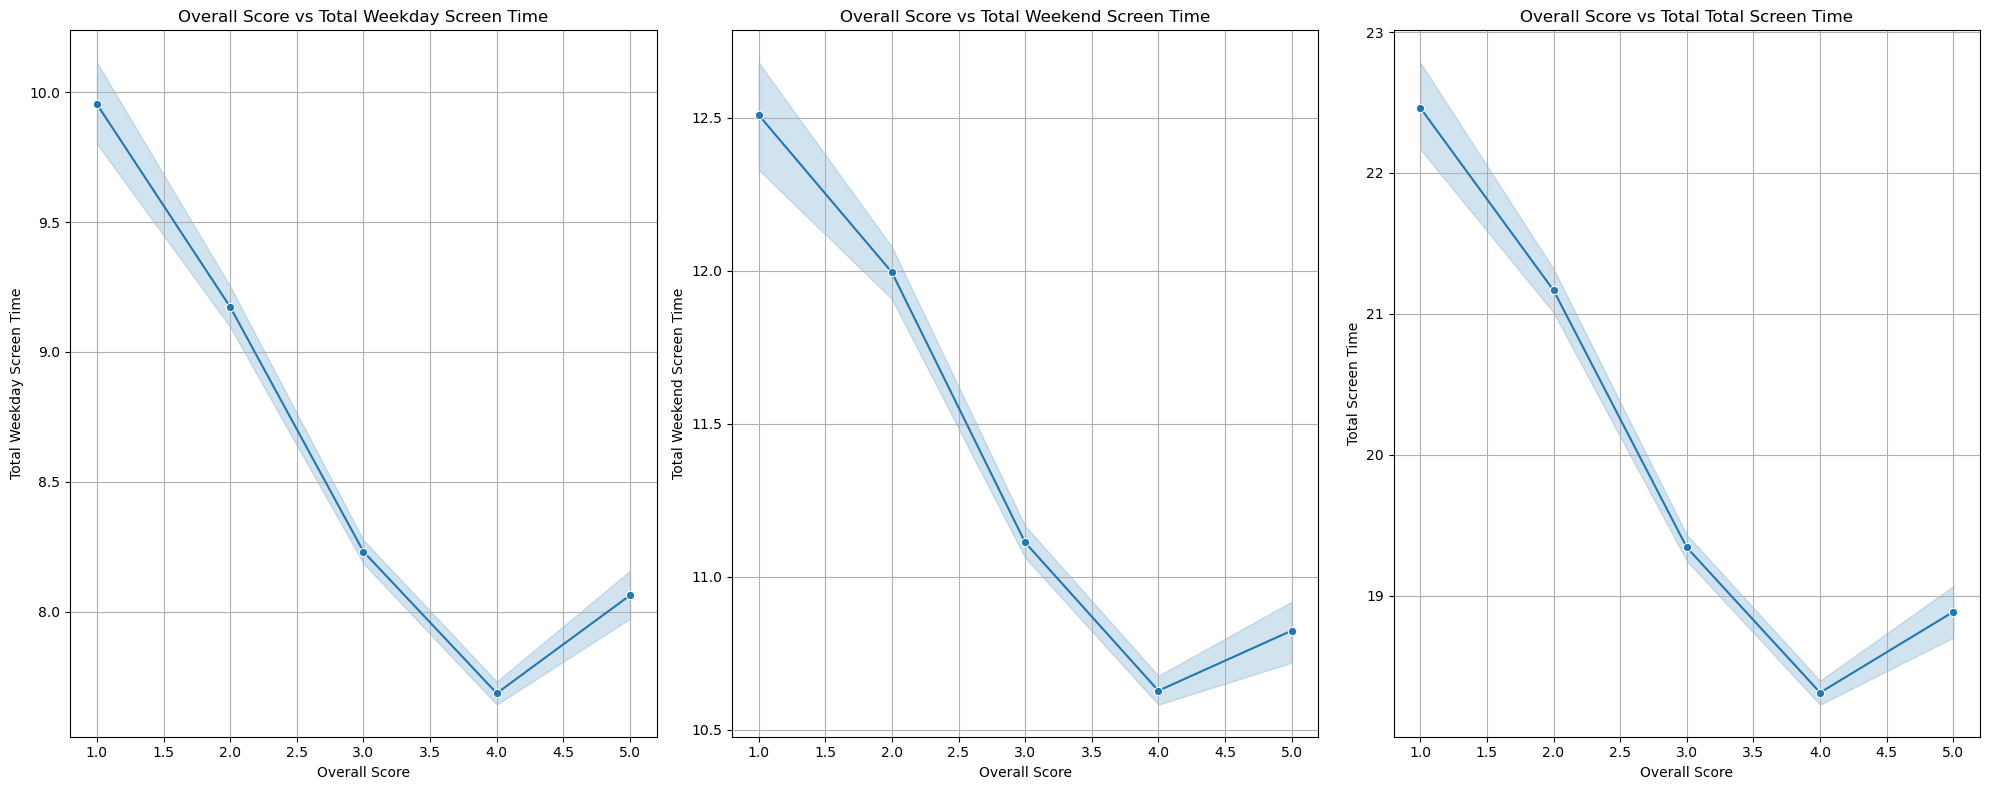

In [88]:
# Plotting the line plot for Overall_Score vs Total_Weekday_Screen_Time
plt.figure(figsize=(20, 8))

# Line plot for Overall_Score vs Total_Weekday_Screen_Time
plt.subplot(1, 3, 1)
sns.lineplot(x='Mode_Score', y='Total_Weekday_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Weekday Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Weekday Screen Time')
plt.grid(True)

# Line plot for Overall_Score vs Total_Weekend_Screen_Time
plt.subplot(1, 3, 2)
sns.lineplot(x='Mode_Score', y='Total_Weekend_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Weekend Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Weekend Screen Time')
plt.grid(True)

# Line plot for Overall_Score vs Total_Screen_Time
plt.subplot(1, 3, 3)
sns.lineplot(x='Mode_Score', y='Total_Screen_Time', data=merged_df, marker='o', palette='viridis')
plt.title('Overall Score vs Total Total Screen Time')
plt.xlabel('Overall Score')
plt.ylabel('Total Screen Time')
plt.grid(True)

plt.tight_layout()
plt.show()


## 4. Descriptive Statistics

In [89]:

weekday_avg = merged_df['Total_Weekday_Screen_Time'].mean()
weekend_avg = merged_df['Total_Weekend_Screen_Time'].mean()
print(f"Average Weekday Screen Time: {weekday_avg}")
print(f"Average Weekend Screen Time: {weekend_avg}")

gender_screen_time = merged_df.groupby('gender')[['Total_Weekday_Screen_Time', 'Total_Weekend_Screen_Time','Total_Screen_Time']].mean()
print(gender_screen_time)
deprived_wellbeing = merged_df.groupby('gender')['Overall_Score'].mean()
print(deprived_wellbeing)
minority_wellbeing = merged_df.groupby('minority')['Overall_Score'].mean()
print(minority_wellbeing)
deprived_wellbeing = merged_df.groupby('deprived')['Overall_Score'].mean()
print(deprived_wellbeing)

# Gender count
gender_count = merged_df['gender'].value_counts()
print("Gender Count:")
print(gender_count)

# Minority count
minority_count = merged_df['minority'].value_counts()
print("\nMinority Count:")
print(minority_count)

# Deprived count
deprived_count = merged_df['deprived'].value_counts()
print("\nDeprived Count:")
print(deprived_count)

# Derived Overall Score count
overall_score_count = merged_df['Overall_Score'].value_counts()
print("\nOverall Score Count:")
print(overall_score_count)

#sns.violinplot(x='Overall_Score', y='Total_Weekday_Screen_Time', data=merged_df)
#plt.title('Total Weekday Screen Time vs Overall Score')
#plt.show()

#sns.violinplot(x='Overall_Score', y='Total_Weekend_Screen_Time', data=merged_df)
#plt.title('Total Weekend Screen Time vs Overall Score')
#plt.show()



Average Weekday Screen Time: 8.207167423024481
Average Weekend Screen Time: 11.076339567349763
        Total_Weekday_Screen_Time  Total_Weekend_Screen_Time  \
gender                                                         
0                        8.236485                  10.790074   
1                        8.174380                  11.396493   

        Total_Screen_Time  
gender                     
0               19.026559  
1               19.570873  
gender
0    3.189342
1    3.562175
Name: Overall_Score, dtype: float64
minority
0    3.363421
1    3.371896
Name: Overall_Score, dtype: float64
deprived
0    3.384924
1    3.338741
Name: Overall_Score, dtype: float64
Gender Count:
0    51885
1    46393
Name: gender, dtype: int64

Minority Count:
0    76011
1    22267
Name: minority, dtype: int64

Deprived Count:
0    56606
1    41672
Name: deprived, dtype: int64

Overall Score Count:
3    43927
4    40293
2     9568
5     3540
1      950
Name: Overall_Score, dtype: int64


## Data Visualization

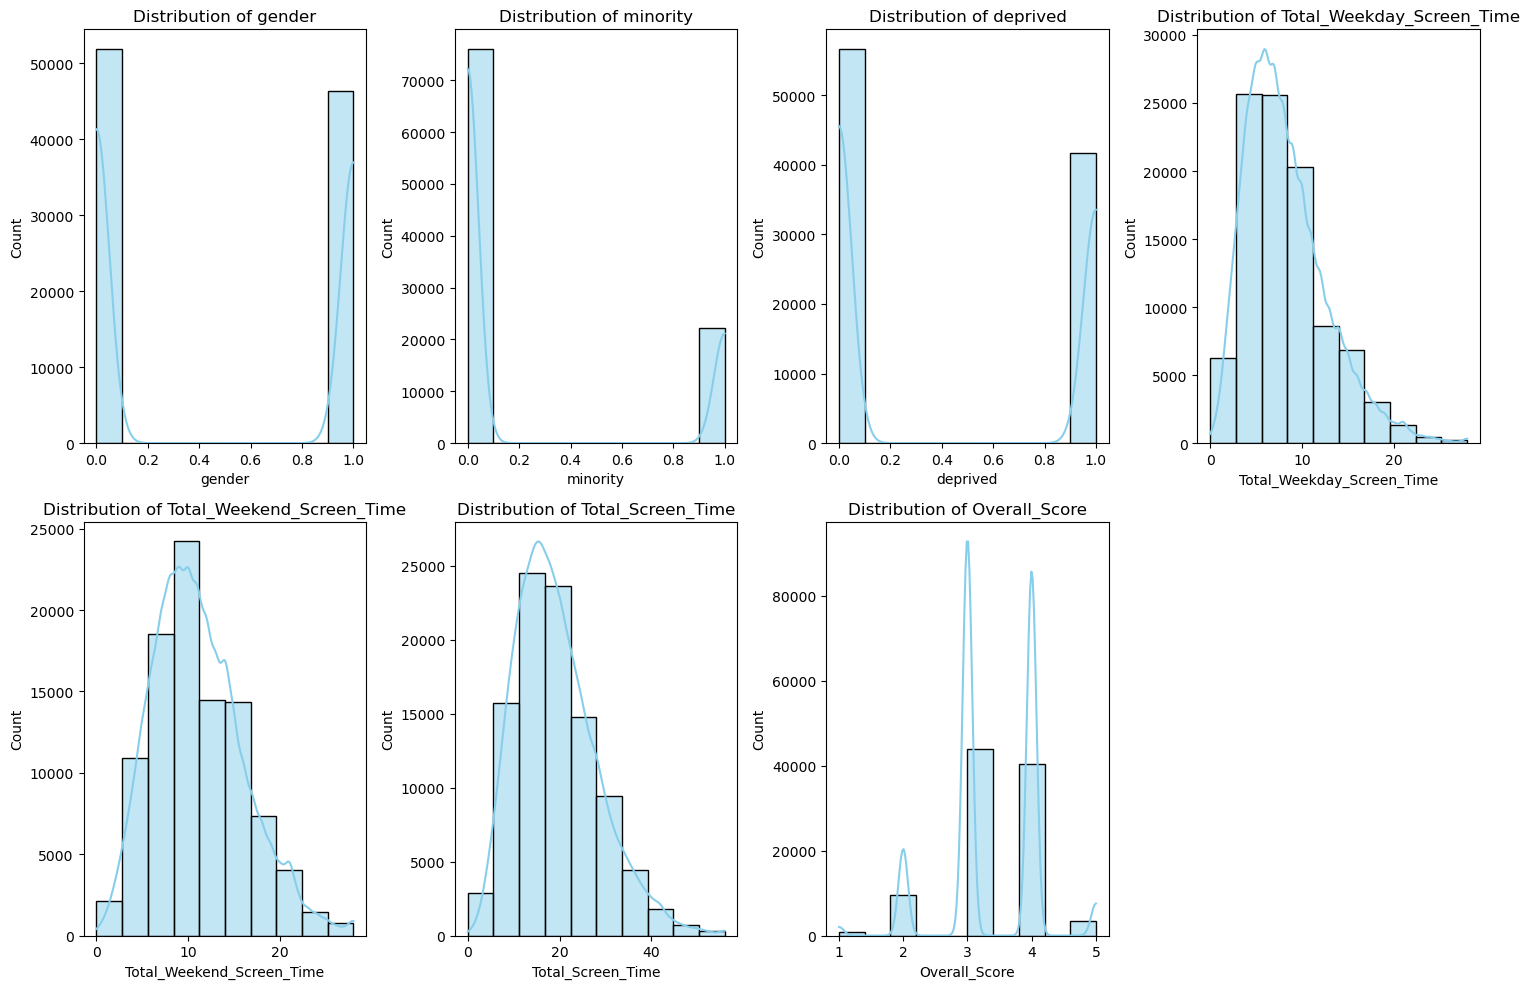

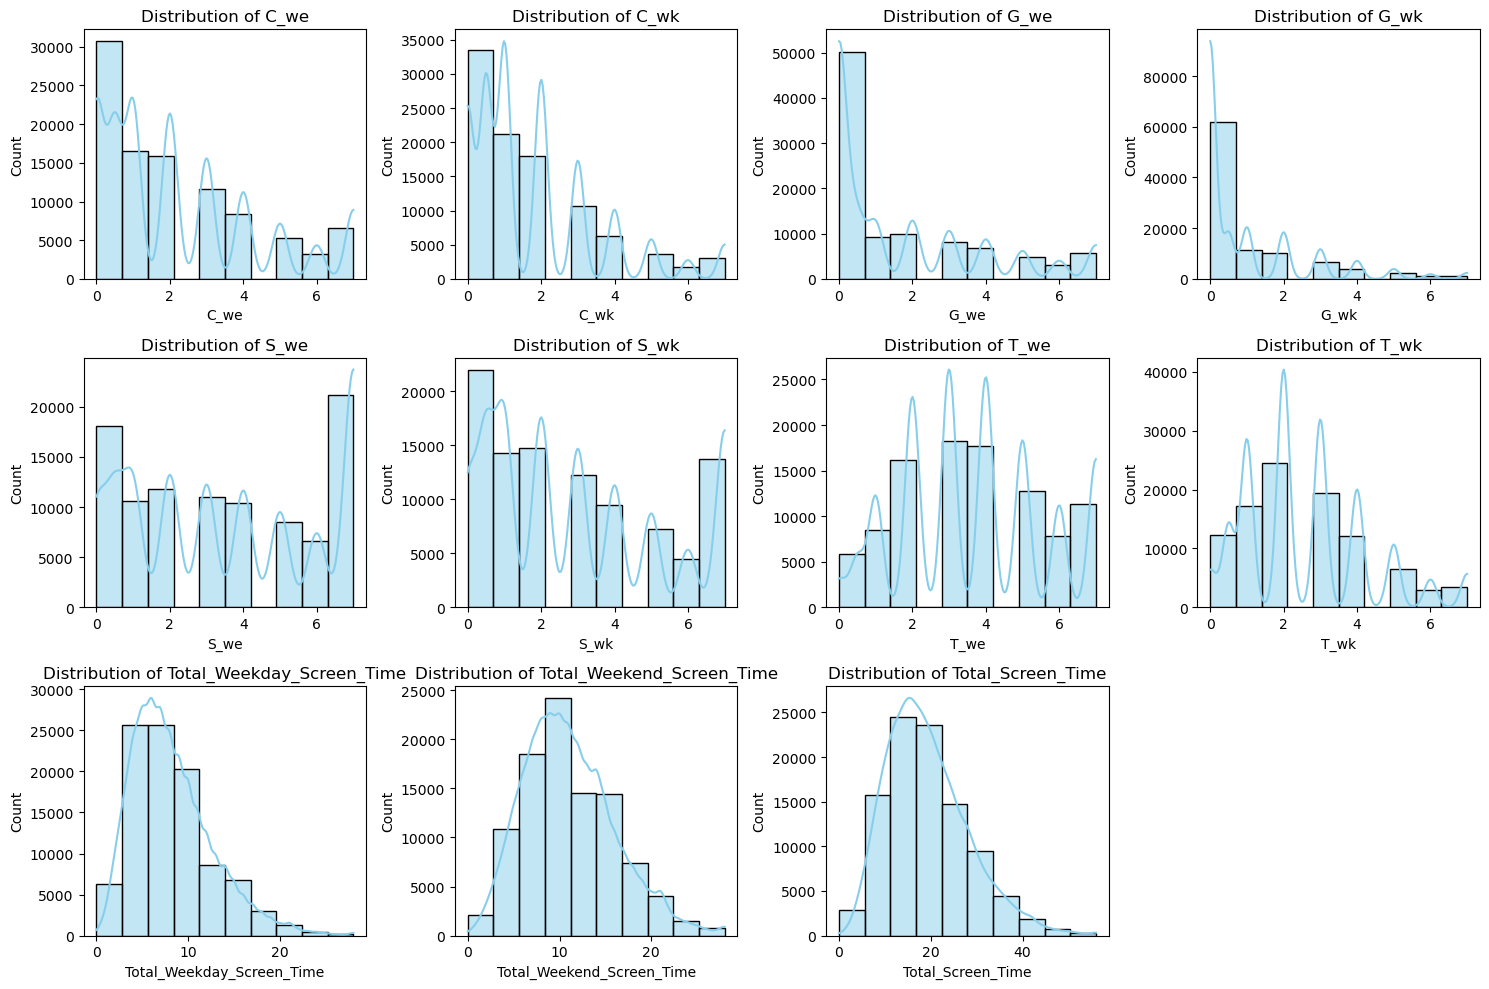

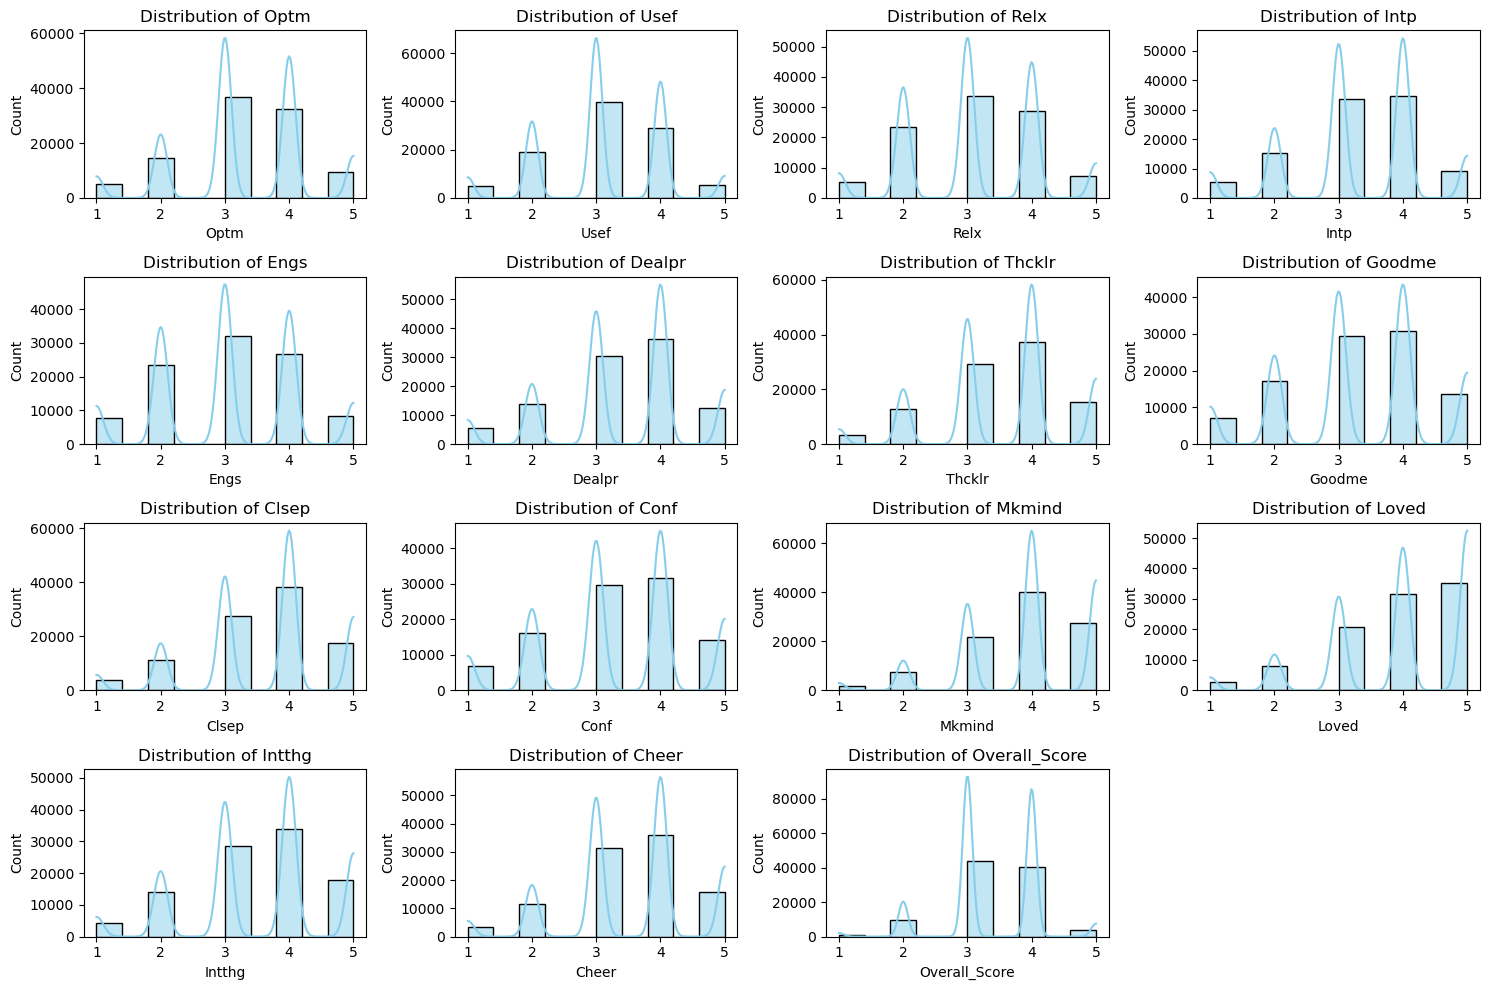

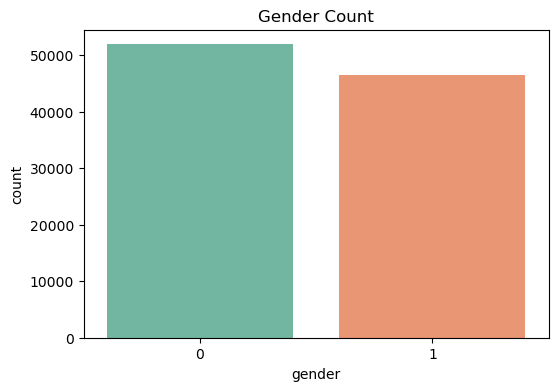

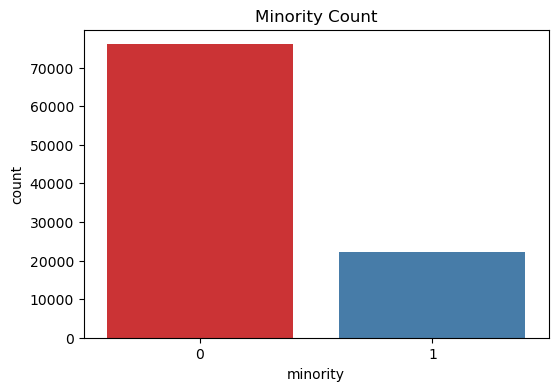

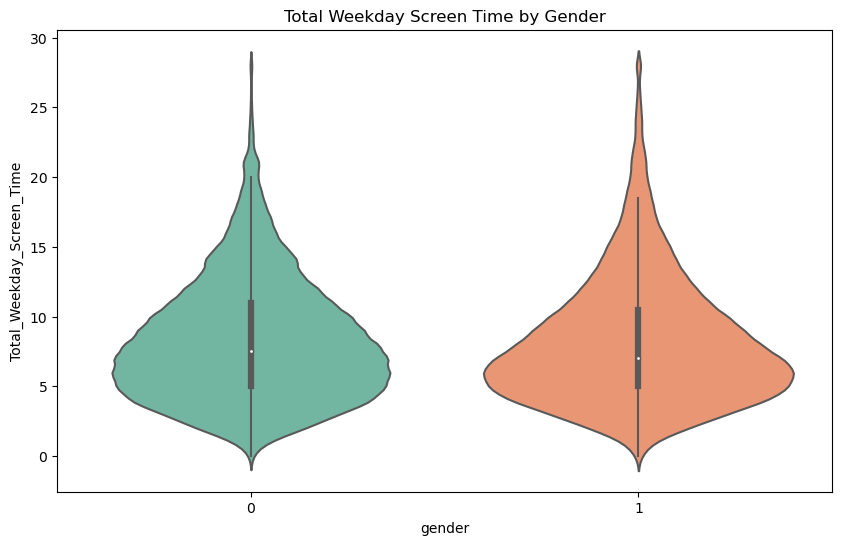

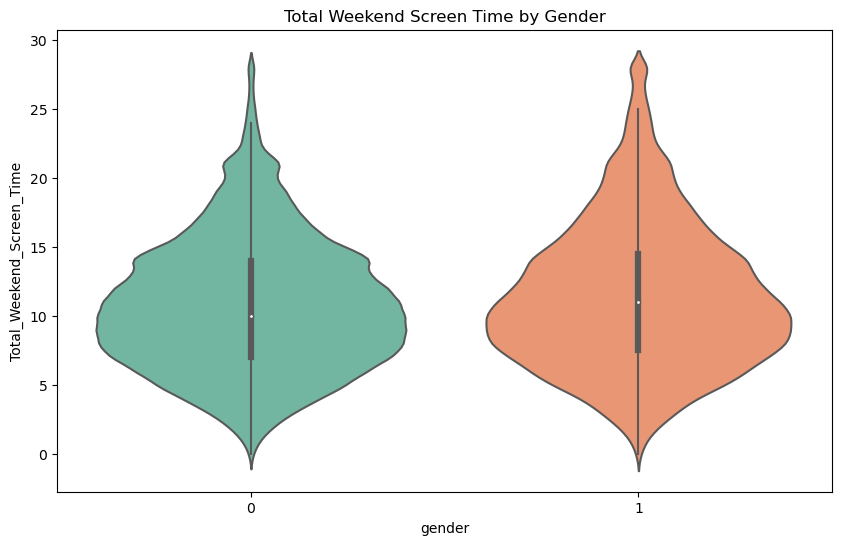

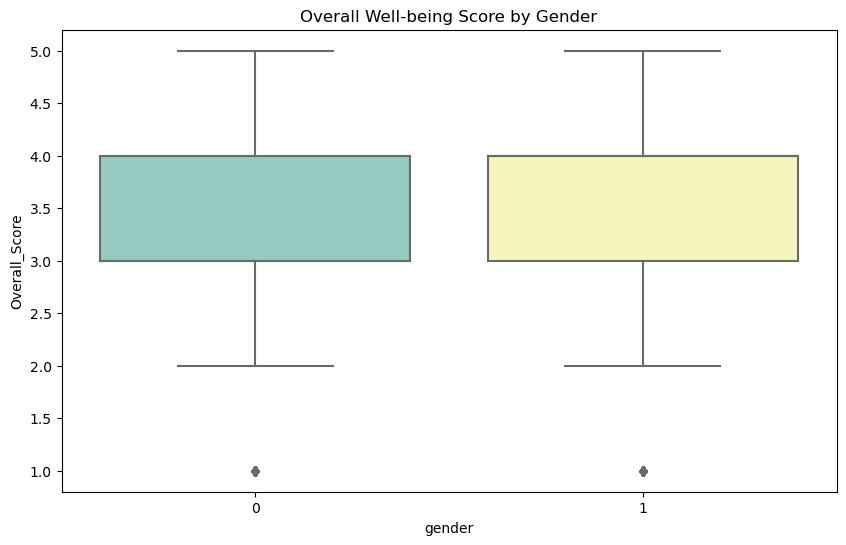

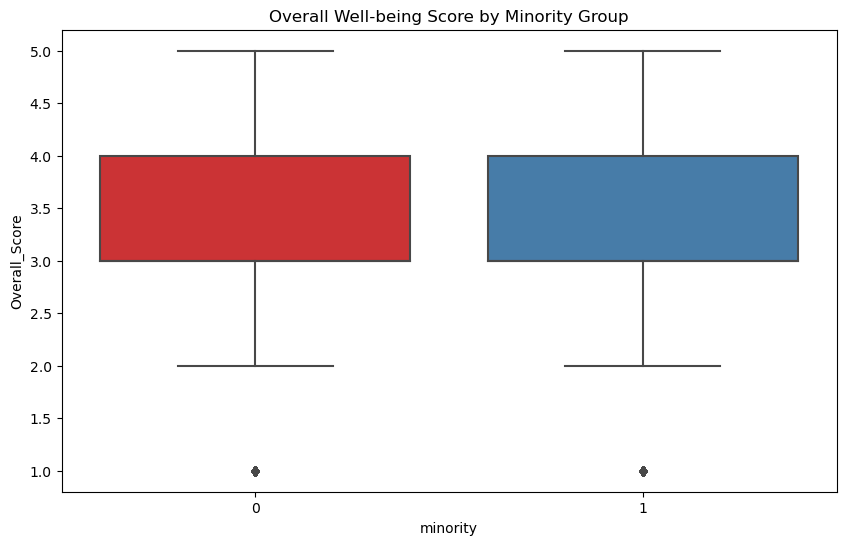

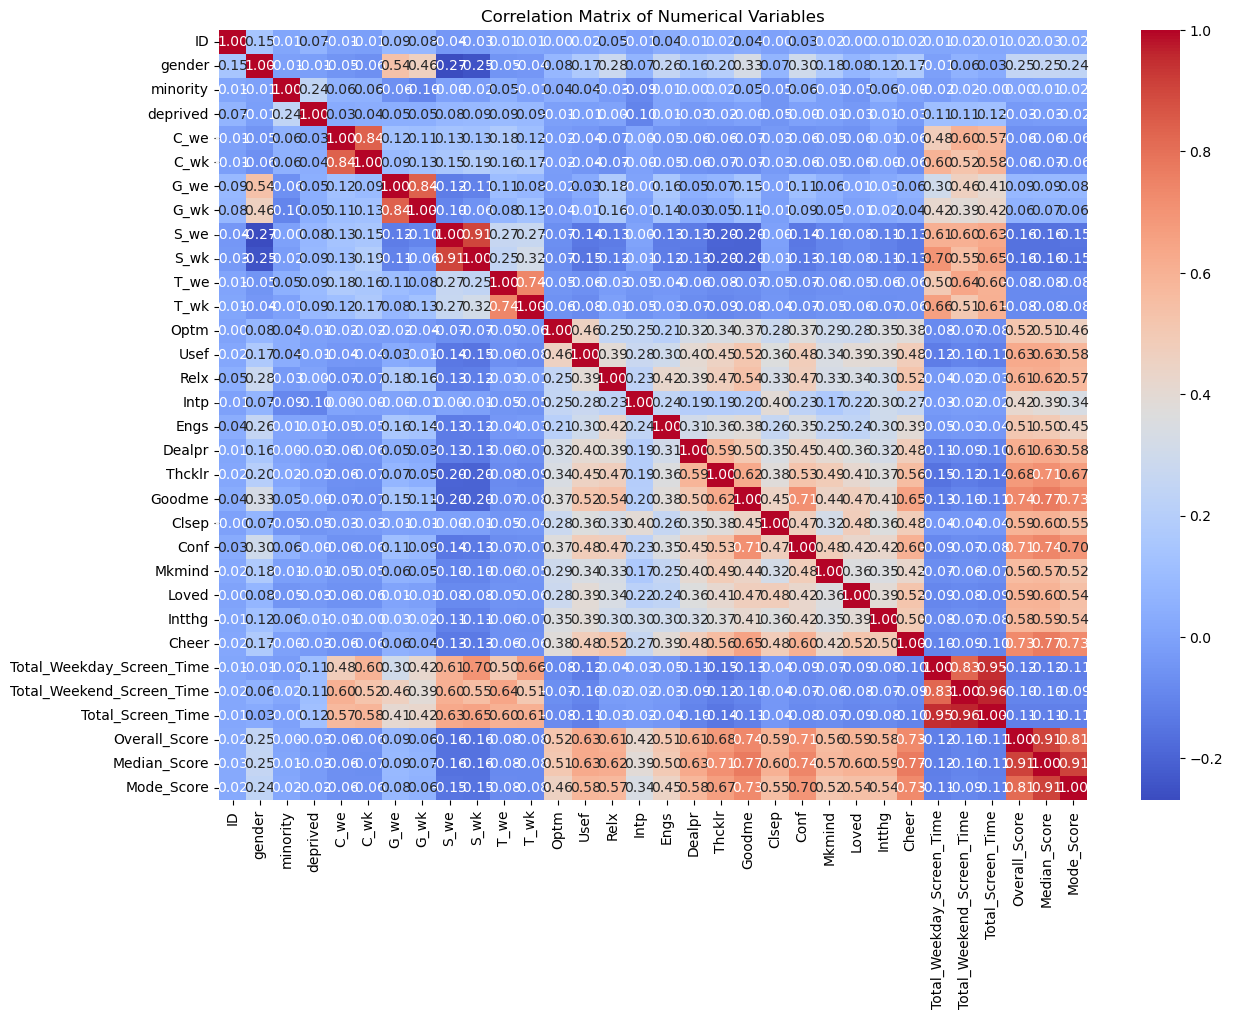

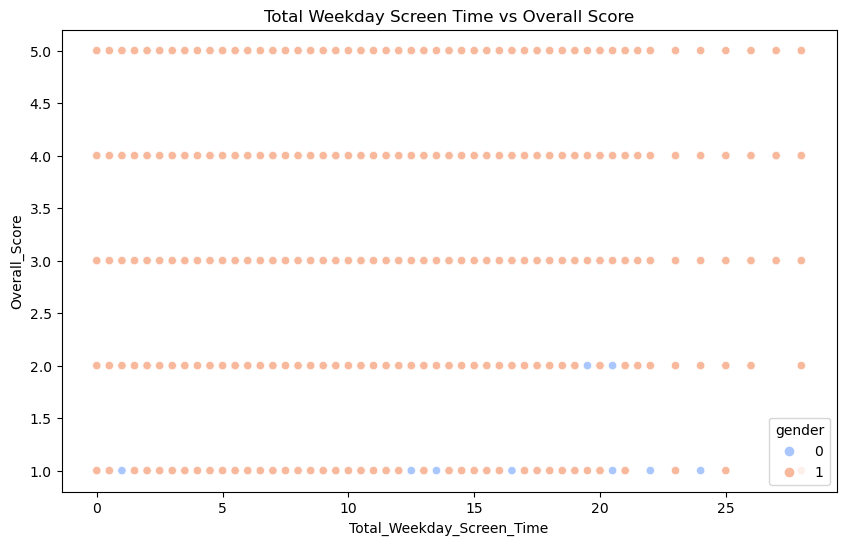

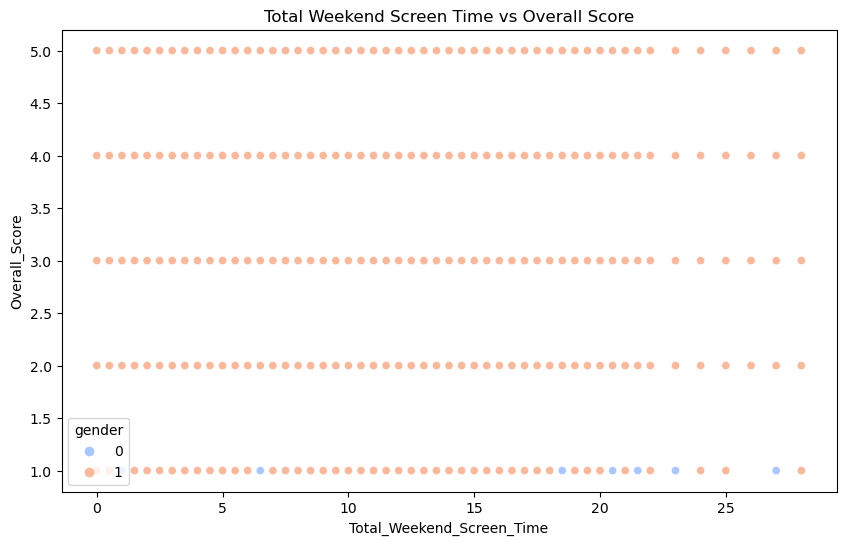

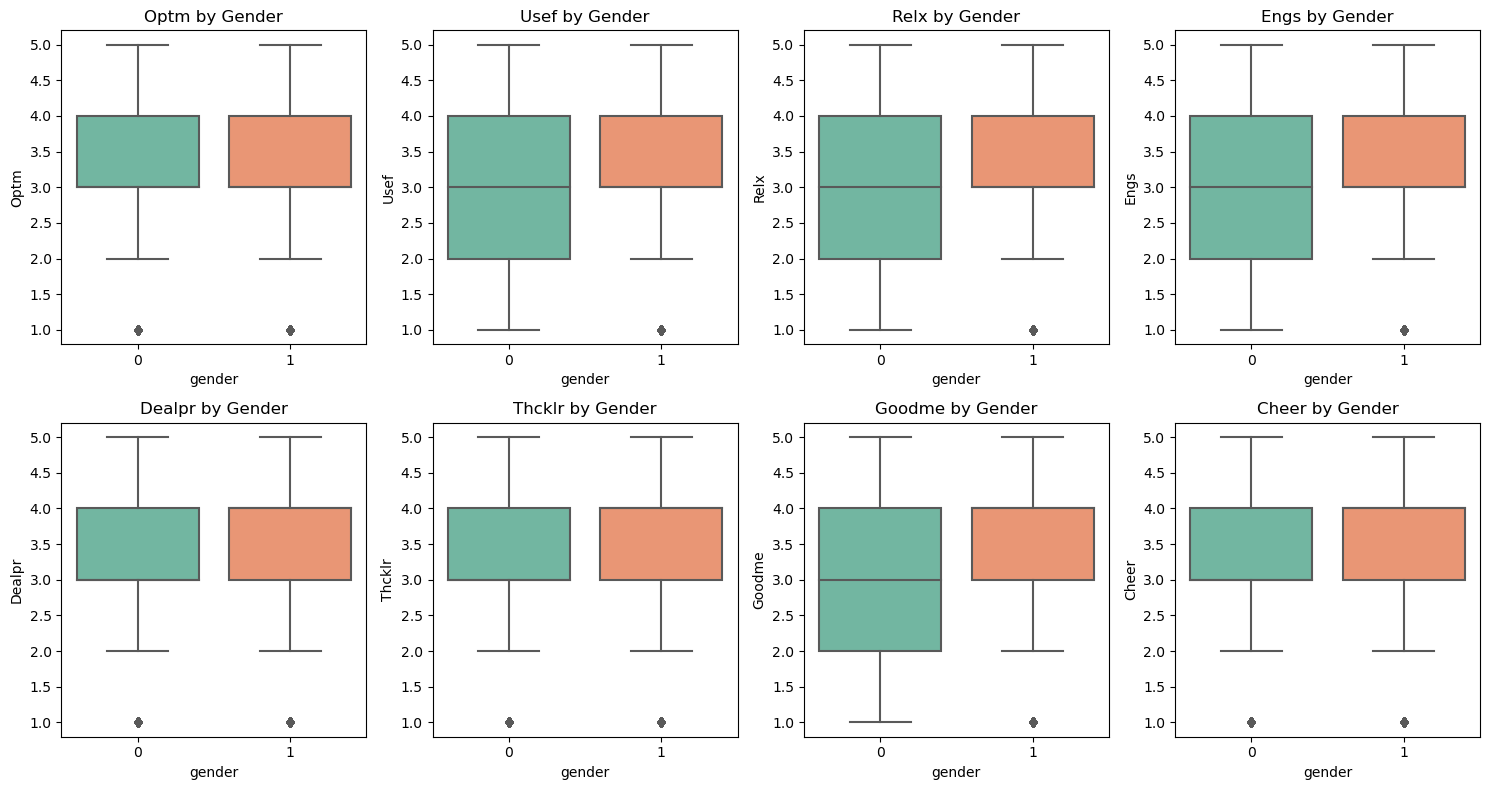

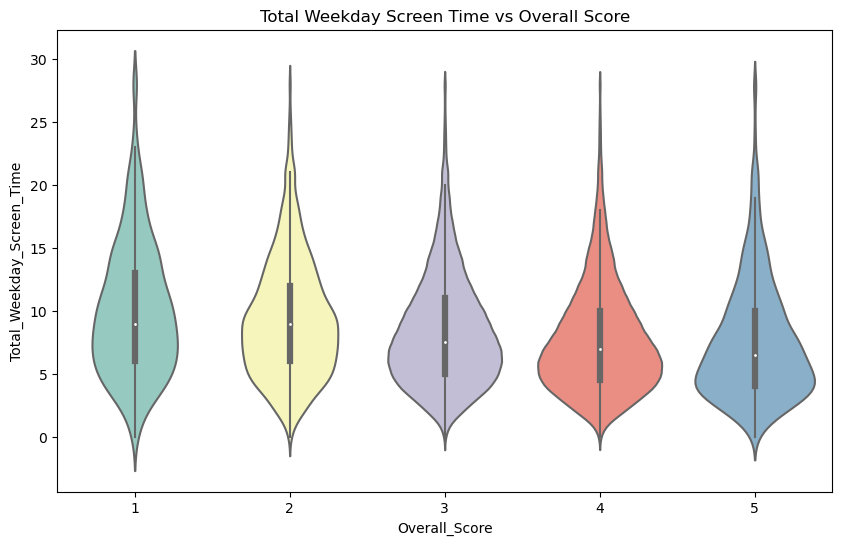

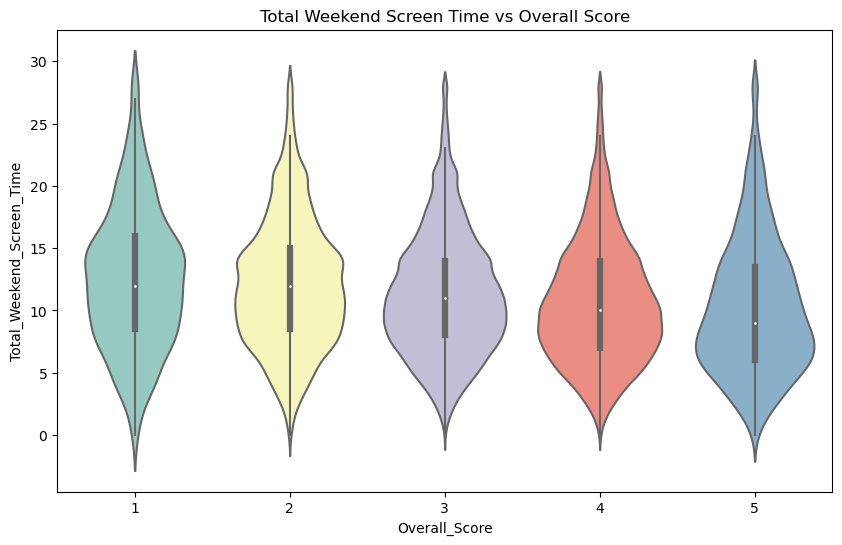

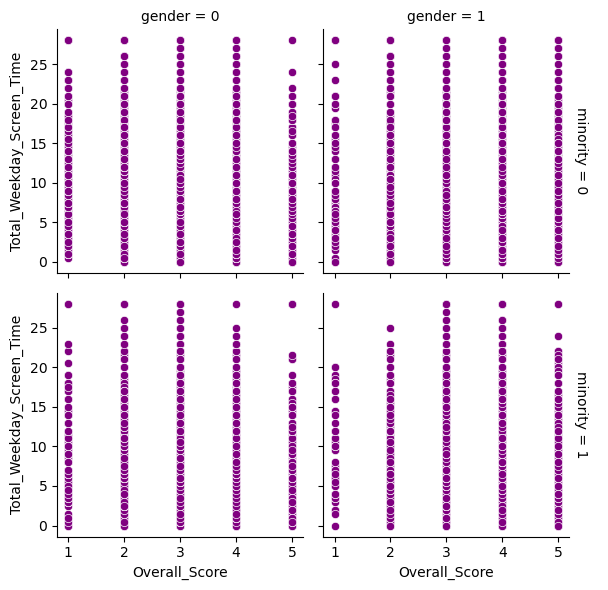

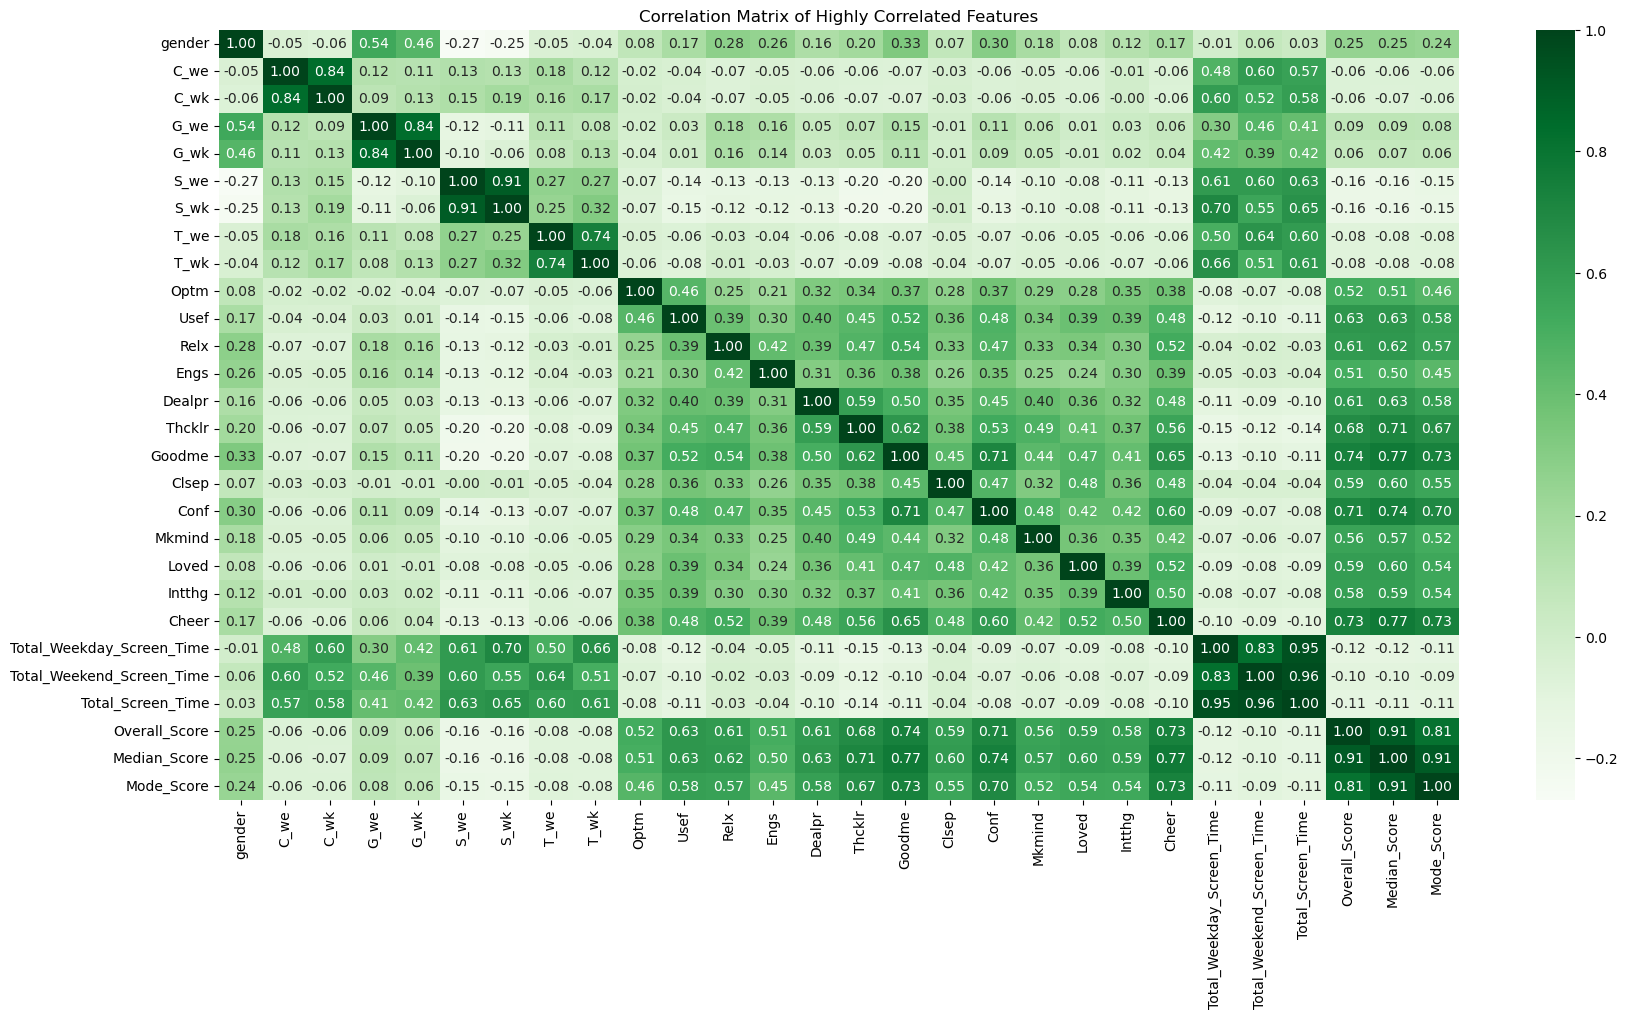

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for the well-being and screen time columns
columns = ['gender','minority','deprived','Total_Weekday_Screen_Time', 'Total_Weekend_Screen_Time','Total_Screen_Time','Overall_Score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(merged_df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Plotting histograms for the well-being and screen time columns
columns = ['C_we','C_wk','G_we','G_wk','S_we','S_wk','T_we','T_wk','Total_Weekday_Screen_Time', 'Total_Weekend_Screen_Time','Total_Screen_Time']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(merged_df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plotting histograms for the well-being and screen time columns
columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 
           'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer','Overall_Score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(merged_df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


#,,
# Bar plot for gender count
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=merged_df, palette='Set2')
plt.title('Gender Count')
plt.show()

# Bar plot for minority count
plt.figure(figsize=(6, 4))
sns.countplot(x='minority', data=merged_df, palette='Set1')
plt.title('Minority Count')
plt.show()


# Violin plot for screen time by gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='Total_Weekday_Screen_Time', data=merged_df, palette='Set2')
plt.title('Total Weekday Screen Time by Gender')
plt.show()

# Violin plot for weekend screen time by gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='Total_Weekend_Screen_Time', data=merged_df, palette='Set2')
plt.title('Total Weekend Screen Time by Gender')
plt.show()


# Box plot for Overall Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='Overall_Score', data=merged_df, palette='Set3')
plt.title('Overall Well-being Score by Gender')
plt.show()

# Box plot for Overall Score by Minority Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='minority', y='Overall_Score', data=merged_df, palette='Set1')
plt.title('Overall Well-being Score by Minority Group')
plt.show()


# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



# Scatter plot for Total Weekday Screen Time vs Overall Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Weekday_Screen_Time', y='Overall_Score', hue='gender', data=merged_df, palette='coolwarm')
plt.title('Total Weekday Screen Time vs Overall Score')
plt.show()

# Scatter plot for Total Weekend Screen Time vs Overall Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Weekend_Screen_Time', y='Overall_Score', hue='gender', data=merged_df, palette='coolwarm')
plt.title('Total Weekend Screen Time vs Overall Score')
plt.show()

# Box plot for well-being indicators by gender
plt.figure(figsize=(15, 8))
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Cheer']

for i, col in enumerate(wellbeing_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='gender', y=col, data=merged_df, palette='Set2')
    plt.title(f'{col} by Gender')
plt.tight_layout()
plt.show()


# Violin plot for Overall Score
plt.figure(figsize=(10, 6))
sns.violinplot(x='Overall_Score', y='Total_Weekday_Screen_Time', data=merged_df, palette='Set3')
plt.title('Total Weekday Screen Time vs Overall Score')
plt.show()

# Violin plot for Total Weekend Screen Time vs Overall Score
plt.figure(figsize=(10, 6))
sns.violinplot(x='Overall_Score', y='Total_Weekend_Screen_Time', data=merged_df, palette='Set3')
plt.title('Total Weekend Screen Time vs Overall Score')
plt.show()


# FacetGrid to analyze Overall Score and Screen Time by Gender and Minority
g = sns.FacetGrid(merged_df, col="gender", row="minority", margin_titles=True)
g.map(sns.scatterplot, "Overall_Score", "Total_Weekday_Screen_Time", color="purple")
g.add_legend()
plt.show()


# Calculate the correlation matrix for all numerical features
correlation_matrix = merged_df.corr()

# Step 2: Filter the correlation matrix to get highly correlated features (e.g., correlation > 0.6 or <-0.6)
high_corr_threshold = 0.5  # Set your threshold here
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > high_corr_threshold) & 
                                  (high_corr_pairs['Feature_1'] != high_corr_pairs['Feature_2'])]

# Step 3: Get the unique set of highly correlated features
high_corr_features = pd.unique(high_corr_pairs[['Feature_1', 'Feature_2']].values.ravel('K'))

# Step 4: Create a correlation matrix for these highly correlated features
high_corr_matrix = merged_df[high_corr_features].corr()

# Step 5: Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()



## 5. Machine Learning Models

In [22]:
# Define features and target variable
X = merged_df[['gender', 'minority', 'deprived','Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 
           'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer','Overall_Score', 'Total_Weekday_Screen_Time', 'Total_Weekend_Screen_Time', 'Total_Screen_Time']]  # Features
y = merged_df['Overall_Score']  # Target variable

#sample 10000 rows from the dataset
X_sampled,_,y_sampled,_=train_test_split(X,y,train_size=10000,random_state=42)

#splitting the sampled dataset in training and testing(70% training and 30% Testing)

X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.3,random state=42)







D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.9283333333333333
Precision: 0.8983673343413456
Recall: 0.9283333333333333
F1 Score: 0.9120949183882896

Confusion Matrix (Logistic Regression):
[[   0   25    0    0    0]
 [   8  238   52    0    0]
 [   2    4 1350    0    1]
 [   0    0    0 1196   19]
 [   0    0    0  104    1]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.89      0.80      0.84       298
           3       0.96      0.99      0.98      1357
           4       0.92      0.98      0.95      1215
           5       0.05      0.01      0.02       105

    accuracy                           0.93      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.90      0.93      0.91      3000



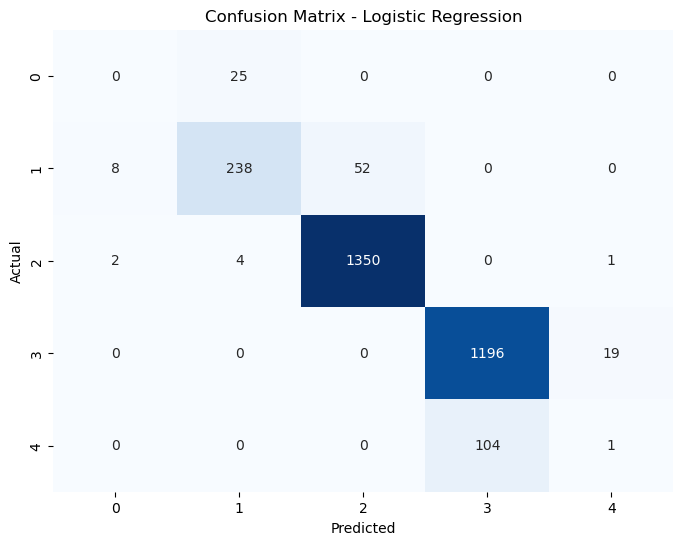

In [23]:

### Logistic Regression Model ###
# Step 1: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')  # multi_class='multinomial' for multi-class classification
log_reg.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_logreg = log_reg.predict(X_test)

# Step 3: Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg, average='weighted')
logreg_recall = recall_score(y_test, y_pred_logreg, average='weighted')
logreg_f1 = f1_score(y_test, y_pred_logreg, average='weighted')

# Print Logistic Regression results
print("Logistic Regression Results:")
print(f"Accuracy: {logreg_accuracy}")
print(f"Precision: {logreg_precision}")
print(f"Recall: {logreg_recall}")
print(f"F1 Score: {logreg_f1}")
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Gradient Boosting Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix (Gradient Boosting):
[[  25    0    0    0    0]
 [   0  298    0    0    0]
 [   0    0 1357    0    0]
 [   0    0    0 1215    0]
 [   0    0    0    0  105]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00       298
           3       1.00      1.00      1.00      1357
           4       1.00      1.00      1.00      1215
           5       1.00      1.00      1.00       105

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



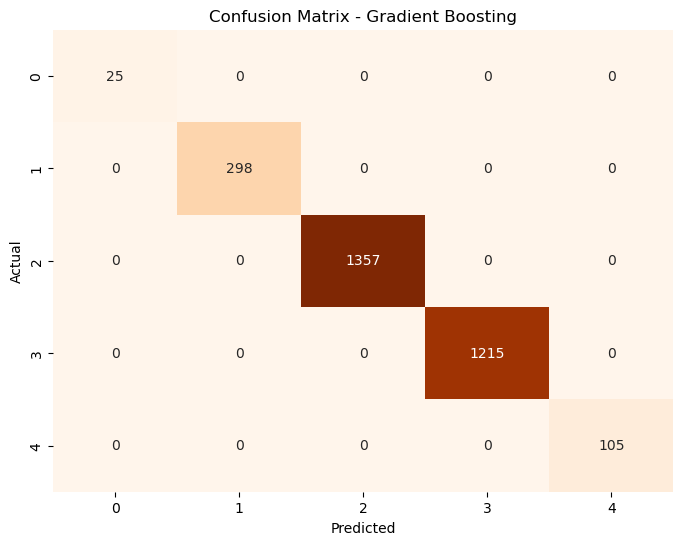

In [24]:

### Gradient Boosting Classifier ###
# Step 1: Train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # n_estimators: Number of boosting stages to be run
gb_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_gb = gb_model.predict(X_test)

# Step 3: Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb, average='weighted')
gb_recall = recall_score(y_test, y_pred_gb, average='weighted')
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')

# Print Gradient Boosting results
print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1}")
print("\nConfusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix Plot for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Support Vector Machine Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix (SVM):
[[  25    0    0    0    0]
 [   0  298    0    0    0]
 [   0    0 1357    0    0]
 [   0    0    0 1215    0]
 [   0    0    0    0  105]]

Classification Report (SVM):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00       298
           3       1.00      1.00      1.00      1357
           4       1.00      1.00      1.00      1215
           5       1.00      1.00      1.00       105

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



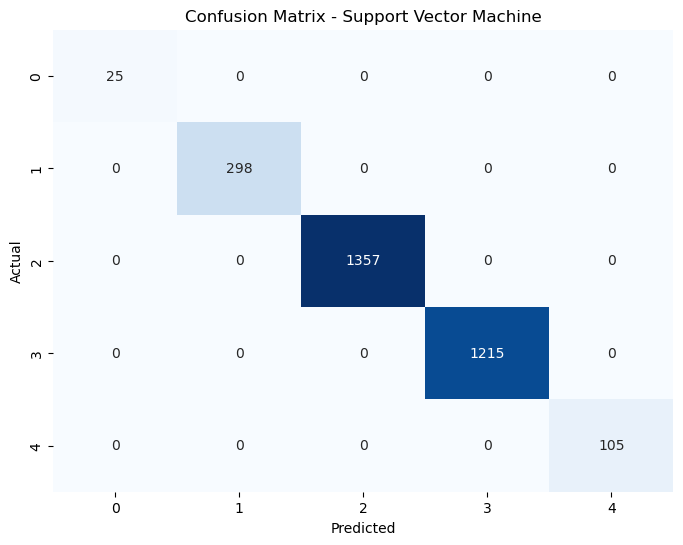

In [25]:

### Support Vector Machine (SVM) ###
# Step 1: Train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel; you can try 'rbf' or other kernels for better results
svm_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_svm = svm_model.predict(X_test)

# Step 3: Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Print SVM results
print("Support Vector Machine Results:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print("\nConfusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix Plot for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Results:
Accuracy: 0.9413333333333334
Precision: 0.9413596598317014
Recall: 0.9413333333333334
F1 Score: 0.9402873180039258

Confusion Matrix (KNN):
[[  16    9    0    0    0]
 [   2  239   57    0    0]
 [   0    3 1300   54    0]
 [   0    0   27 1182    6]
 [   0    0    0   18   87]]

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.89      0.64      0.74        25
           2       0.95      0.80      0.87       298
           3       0.94      0.96      0.95      1357
           4       0.94      0.97      0.96      1215
           5       0.94      0.83      0.88       105

    accuracy                           0.94      3000
   macro avg       0.93      0.84      0.88      3000
weighted avg       0.94      0.94      0.94      3000



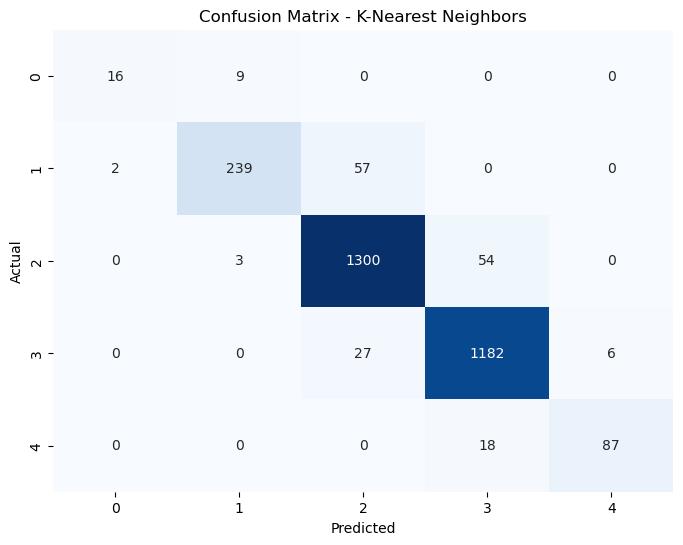

In [26]:
### K-Nearest Neighbors (KNN) Classifier ###
# Step 1: Initialize KNN classifier with a chosen number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the KNN model
knn_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Print KNN results
print("K-Nearest Neighbors Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print("\nConfusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix Plot for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()